In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path='/content/drive/MyDrive/combined_wind_farm_A_data_new.csv'
data=pd.read_csv(file_path, delimiter=',', encoding='utf-8', on_bad_lines='skip')
print("File loaded successfully!")

File loaded successfully!


In [ ]:
# Replace 0 and 2 with 0, and others with 1
data['status_type_id'] = data['status_type_id'].replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1})

print(data['status_type_id'].value_counts())

status_type_id
0    898672
1    298075
Name: count, dtype: int64


In [ ]:
#Renaming the columns
rename_mapping = {
    'time_stamp': 'time_stamp',
    'asset_id': 'asset_id',
    'id': 'id',
    'train_test': 'train_test',
    'status_type_id': 'status_type_id',
    'sensor_0_avg': 'Ambient temperature avg',
    'sensor_1_avg': 'Wind absolute direction avg',
    'sensor_2_avg': 'Wind relative direction avg',
    'wind_speed_3_avg': 'Windspeed avg',
    'wind_speed_4_avg': 'Estimated windspeed avg',
    'wind_speed_3_max': 'Windspeed max',
    'wind_speed_3_min': 'Windspeed min',
    'wind_speed_3_std': 'Windspeed std',
    'sensor_5_avg': 'Pitch angle avg',
    'sensor_5_max': 'Pitch angle max',
    'sensor_5_min': 'Pitch angle min',
    'sensor_5_std': 'Pitch angle std',
    'sensor_6_avg': 'Hub controller temperature avg',
    'sensor_7_avg': 'Top nacelle controller temperature avg',
    'sensor_8_avg': 'Choke coils on the VCS- section temperature avg',
    'sensor_9_avg': 'VCP-board temperature avg',
    'sensor_10_avg': 'VCS cooling water temperature avg',
    'sensor_11_avg': 'Gearbox bearing on high speed shaft  temperature avg',
    'sensor_12_avg': 'Gearbox oil temperature avg',
    'sensor_13_avg': 'Generator bearing 2(Drive end)  temperature avg',
    'sensor_14_avg': 'Generator bearing 1(Non-drive end) temperature avg',
    'sensor_15_avg': 'Generator stator winding phase 1 temperature avg',
    'sensor_16_avg': 'Generator stator winding phase 2 temperature avg',
    'sensor_17_avg': 'Generator stator winding phase 3 temperature avg',
    'sensor_18_avg': 'Generator rpm avg',
    'sensor_18_max': 'Generator rpm max',
    'sensor_18_min': 'Generator rpm min',
    'sensor_18_std': 'Generator rpm std',
    'sensor_19_avg': 'Split ring chamber temperature avg',
    'sensor_20_avg': 'Busbar section temperature avg',
    'sensor_21_avg': 'IGBT-driver on grid side inverter temperature avg',
    'sensor_22_avg': 'Actual Phase displacement avg',
    'sensor_23_avg': 'Averaged current phase 1',
    'sensor_24_avg': 'Averaged current phase 2',
    'sensor_25_avg': 'Averaged current phase 3',
    'sensor_26_avg': 'Grid frequency',
    'reactive_power_27_avg': 'Possible Grid capacitive reactive power avg',
    'reactive_power_27_max': 'Possible Grid capacitive reactive power max',
    'reactive_power_27_min': 'Possible Grid capacitive reactive power min',
    'reactive_power_27_std': 'Possible Grid capacitive reactive power std',
    'reactive_power_28_avg': 'Possible Grid inductive reactive power avg',
    'reactive_power_28_max': 'Possible Grid inductive reactive power max',
    'reactive_power_28_min': 'Possible Grid inductive reactive power min',
    'reactive_power_28_std': 'Possible Grid inductive reactive power std',
    'power_29_avg': 'Possible Grid active power avg',
    'power_29_max': 'Possible Grid active power max',
    'power_29_min': 'Possible Grid active power min',
    'power_29_std': 'Possible Grid active power std',
    'power_30_avg': 'Grid power avg',
    'power_30_max': 'Grid power max',
    'power_30_min': 'Grid power min',
    'power_30_std': 'Grid power std',
    'sensor_31_avg': 'Grid reactive power avg',
    'sensor_31_max': 'Grid reactive power max',
    'sensor_31_min': 'Grid reactive power min',
    'sensor_31_std': 'Grid reactive power std',
    'sensor_32_avg': 'Averaged voltage phase 1',
    'sensor_33_avg': 'Averaged voltage phase 2',
    'sensor_34_avg': 'Averaged voltage phase 3',
    'sensor_35_avg': 'IGBT-driver on rotor side inverter phase 1 temperature avg',
    'sensor_36_avg': 'IGBT-driver on rotor side inverter phase 2 temperature avg',
    'sensor_37_avg': 'IGBT-driver on rotor side inverter phase 3 temperature avg',
    'sensor_38_avg': 'HV transformer phase L1 temperature avg',
    'sensor_39_avg': 'HV transformer phase L2 temperature avg',
    'sensor_40_avg': 'HV transformer phase L3 temperature avg',
    'sensor_41_avg': 'Hydraulic group oil temperature avg',
    'sensor_42_avg': 'Nacelle direction avg',
    'sensor_43_avg': 'Nacelle temperature avg',
    'sensor_44': 'Generator disconnected active power avg',
    'sensor_45': 'Generator connected in delta active power avg',
    'sensor_46': 'Generator connected in star active power avg',
    'sensor_47': 'Generator disconnected reactive power avg',
    'sensor_48': 'Generator connected in delta reactive power avg',
    'sensor_49': 'Generator connected in star reactive power avg',
    'sensor_50': 'Total active power avg',
    'sensor_51': 'Total reactive power avg',
    'sensor_52_avg': 'Rotor rpm avg',
    'sensor_52_max': 'Rotor rpm max',
    'sensor_52_min': 'Rotor rpm min',
    'sensor_52_std': 'Rotor rpm std',
    'sensor_53_avg': 'Nose cone temperature avg',
}

# Rename the columns in the DataFrame
data.rename(columns=rename_mapping, inplace=True)
# Convert time to python date time format
data['time_stamp']=pd.to_datetime(data['time_stamp'])
#Converting object dtypes to strings
data=data.astype({col: 'string' for col in data.select_dtypes(include='object').columns})

In [ ]:
#Handling missing values
data=data.dropna()
missing_data=data.isnull().sum()
print("Missing values: \n", missing_data[missing_data>0])

Missing values: 
 Series([], dtype: int64)


In [ ]:
# Remove columns that contain 'min', 'max', or 'std'
filtered_columns = [col for col in data.columns if not any(keyword in col for keyword in ['min', 'max', 'std'])]
data_avg = data[filtered_columns]
data_avg=data_avg.drop(columns=['event_id', 'id', 'event_label', 'event_description', 'train_test'])

In [ ]:
# Create a list of unique selected features
unique_selected_features = ['time_stamp', 'status_type_id','asset_id', 'Averaged current phase 1', 'VCP-board temperature avg', 'Possible Grid inductive reactive power avg', 'Generator stator winding phase 1 temperature avg', 'Busbar section temperature avg', 'Generator bearing 2(Drive end)  temperature avg', 'Wind relative direction avg', 'VCS cooling water temperature avg', 'Possible Grid active power avg', 'Windspeed avg', 'Averaged current phase 2', 'Split ring chamber temperature avg', 'Estimated windspeed avg', 'IGBT-driver on grid side inverter temperature avg', 'Averaged current phase 3', 'Generator stator winding phase 3 temperature avg', 'Generator bearing 1(Non-drive end) temperature avg', 'Gearbox bearing on high speed shaft  temperature avg', 'Actual Phase displacement avg', 'Gearbox oil temperature avg', 'Pitch angle avg', 'Possible Grid capacitive reactive power avg', 'Generator stator winding phase 2 temperature avg', 'Ambient temperature avg', 'Choke coils on the VCS- section temperature avg', 'Generator rpm avg']

# Create a new dataset with only the unique selected features
unique_data_avg = data[unique_selected_features]


In [ ]:
unique_data_avg=unique_data_avg.drop(columns=['asset_id'])

In [ ]:
# Calculate the correlation matrix for unique_data_avg
correlation_matrix = unique_data_avg.corr()

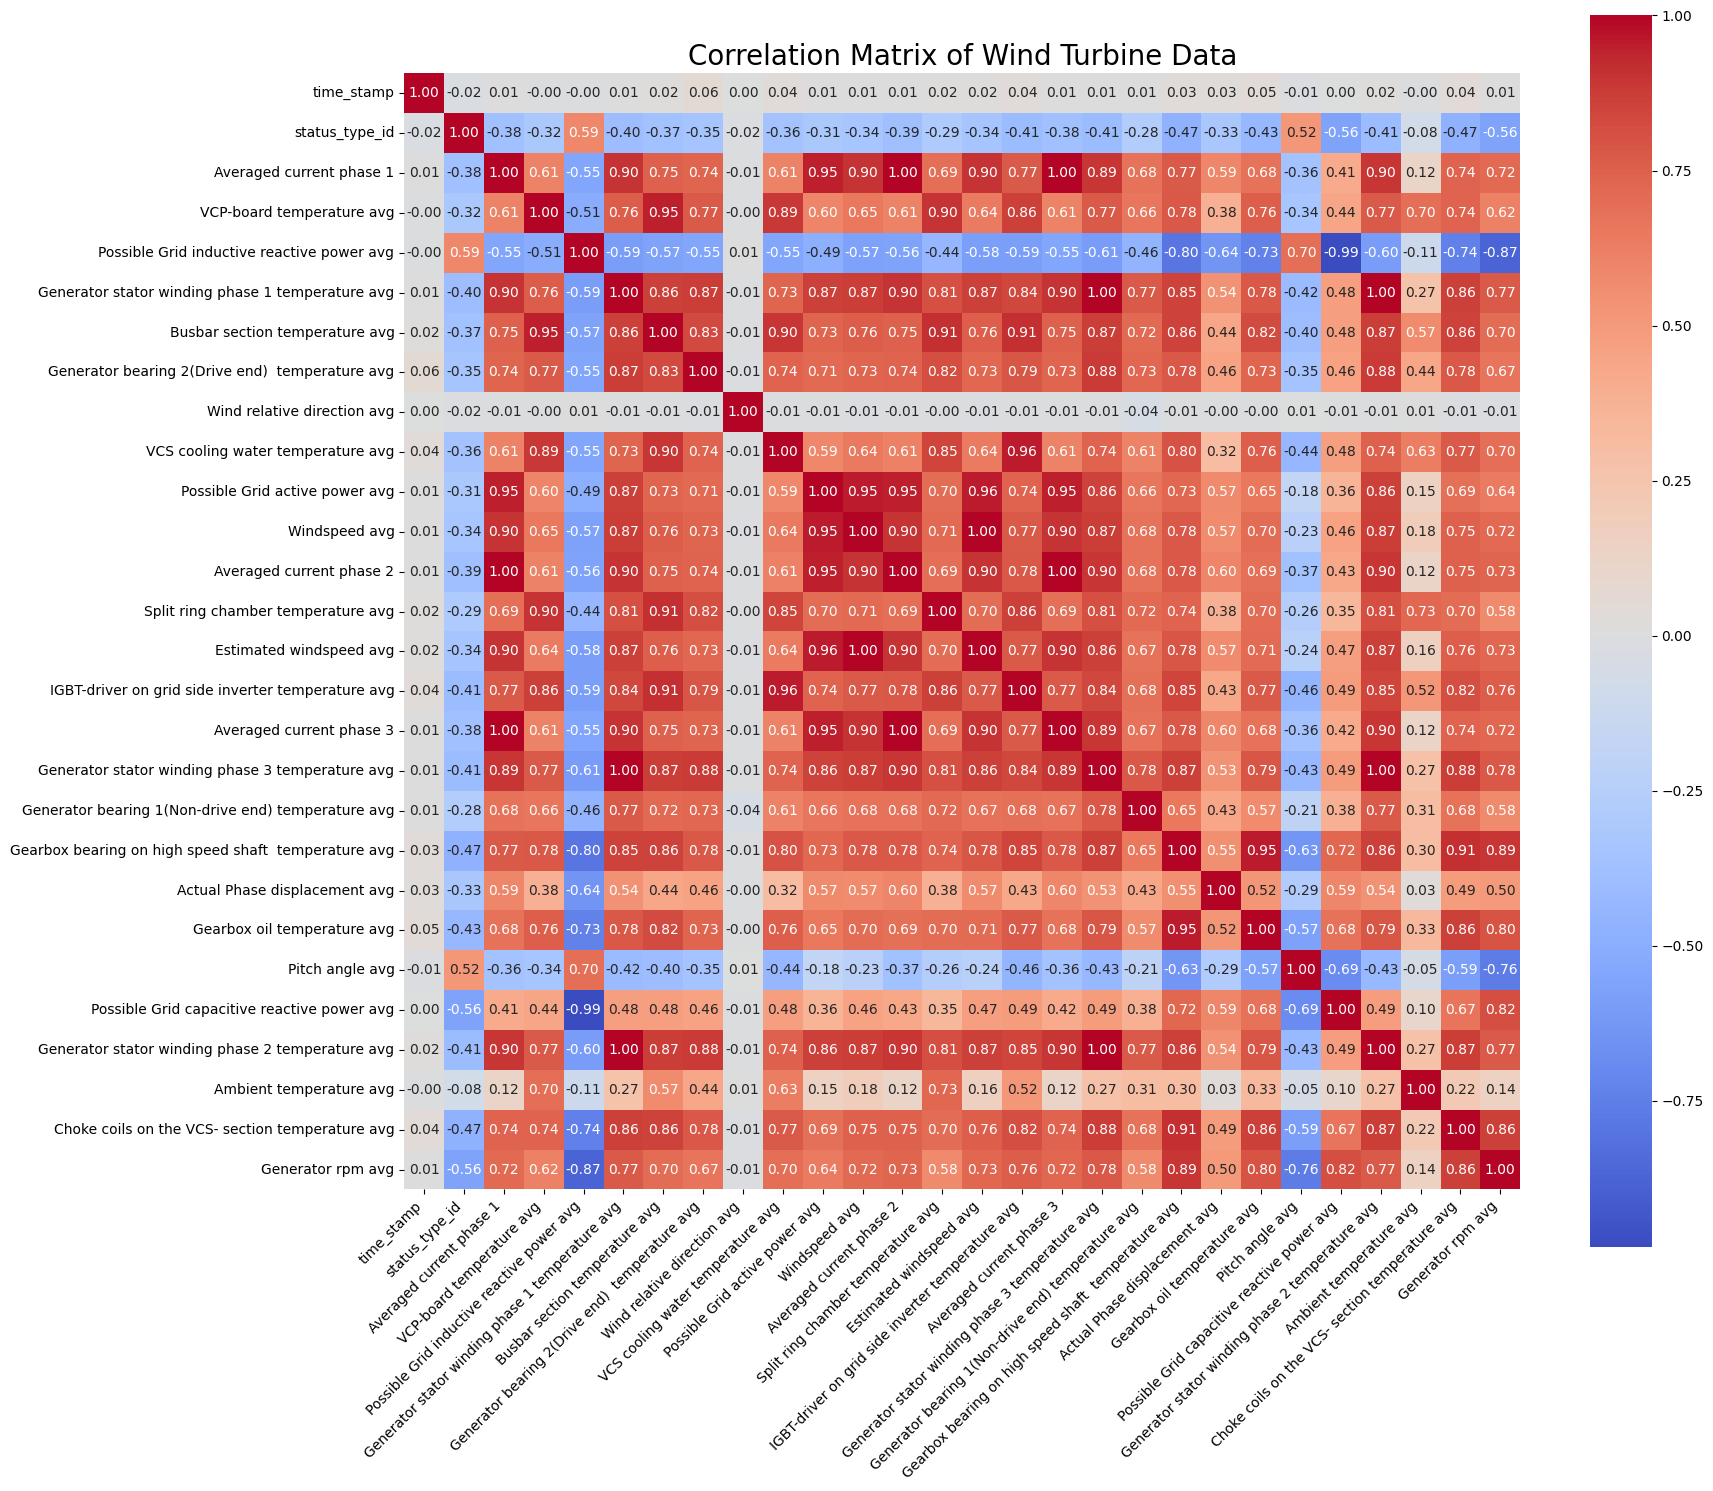

In [ ]:
# Set up the matplotlib figure with larger size
plt.figure(figsize=(18, 16))  # Increase size for better visibility

# Create a heatmap with adjusted font size and label rotation
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            annot_kws={"size": 10},  # Adjust annotation size
            xticklabels=correlation_matrix.columns,  # Ensure labels are used
            yticklabels=correlation_matrix.index)  # Ensure labels are used

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)  # Keep y labels horizontal

# Title and show plot
plt.title('Correlation Matrix of Wind Turbine Data', fontsize=20)
plt.show()

In [ ]:
# Correlation of status_type_id with other features
status_correlations = correlation_matrix['status_type_id'].sort_values(ascending=False)
print(status_correlations)

status_type_id                                          1.000000
Possible Grid inductive reactive power avg              0.586092
Pitch angle avg                                         0.517106
Wind relative direction avg                            -0.015422
time_stamp                                             -0.024015
Ambient temperature avg                                -0.078272
Generator bearing 1(Non-drive end) temperature avg     -0.276629
Split ring chamber temperature avg                     -0.291833
Possible Grid active power avg                         -0.313170
VCP-board temperature avg                              -0.317019
Actual Phase displacement avg                          -0.330927
Windspeed avg                                          -0.336254
Estimated windspeed avg                                -0.343313
Generator bearing 2(Drive end)  temperature avg        -0.345686
VCS cooling water temperature avg                      -0.364399
Busbar section temperatur

In [ ]:
# Selecting the relevant features
selected_features = [
    'status_type_id',
    'Gearbox oil temperature avg',
    'Choke coils on the VCS- section temperature avg',
    'Gearbox bearing on high speed shaft  temperature avg',
    'Generator rpm avg',
    'Possible Grid capacitive reactive power avg',
    'Possible Grid inductive reactive power avg',
    'Pitch angle avg'
]

# Create a new DataFrame with the selected features
subset_data = unique_data_avg[selected_features]

In [ ]:
# Calculate the correlation matrix for the selected features
correlation_matrix_subset = subset_data.corr()

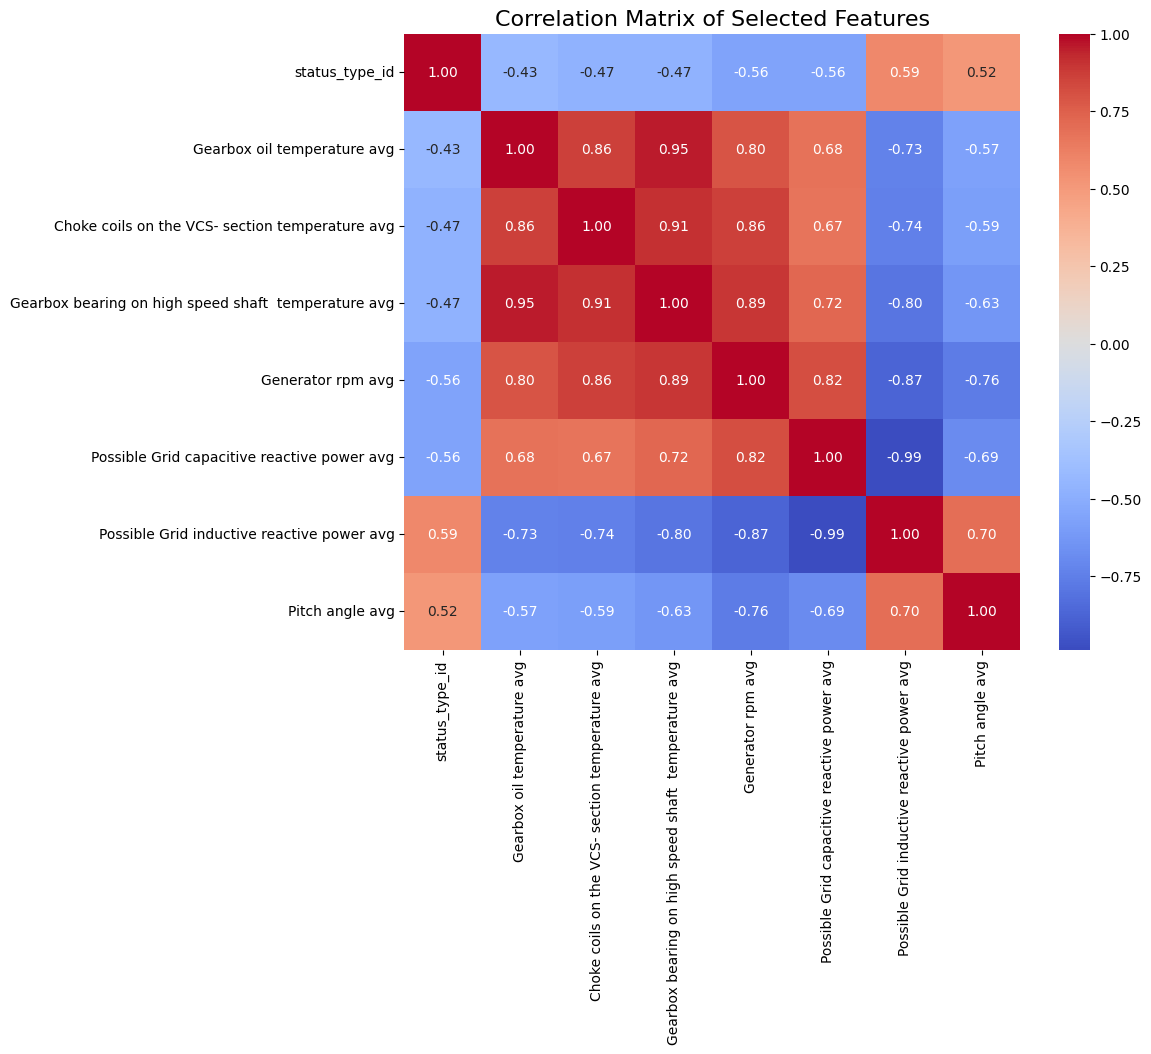

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Create the heatmap
sns.heatmap(correlation_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Title and show plot
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

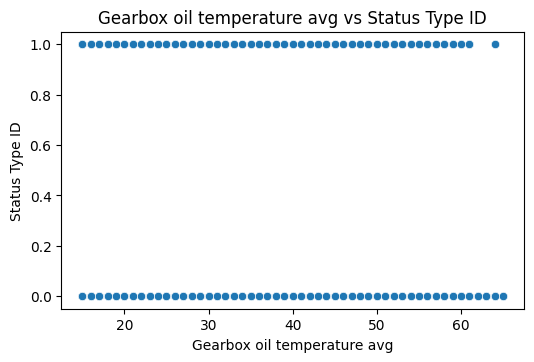

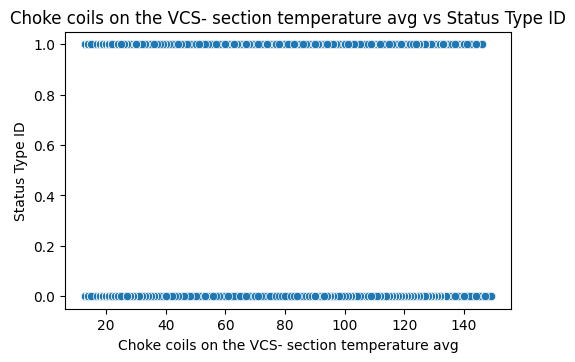

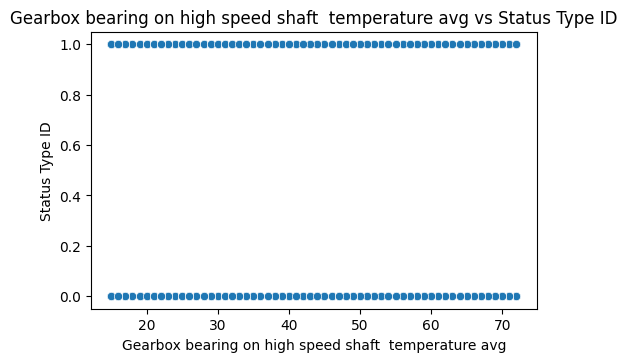

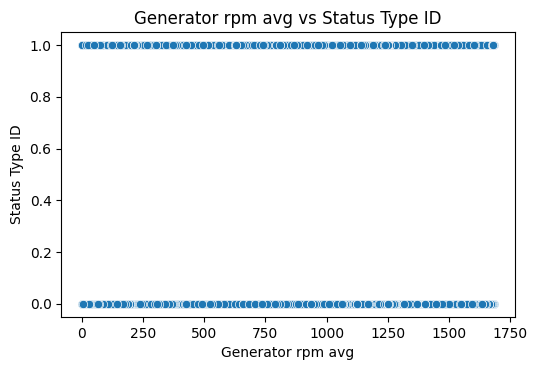

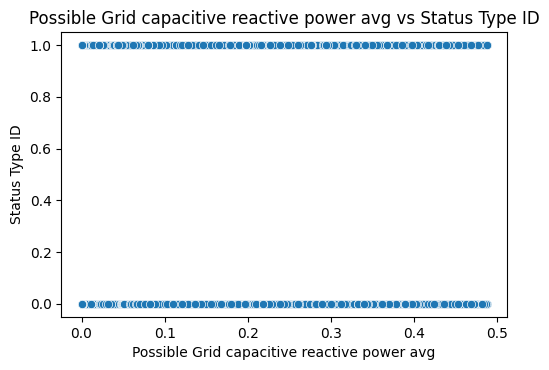

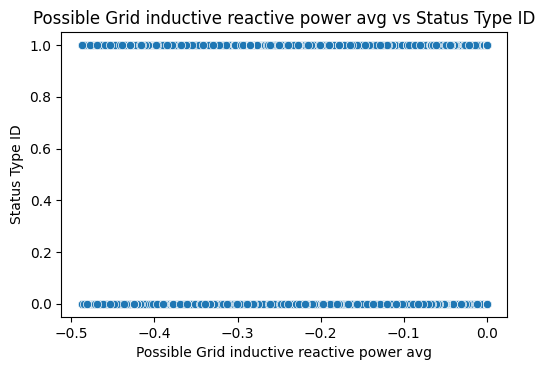

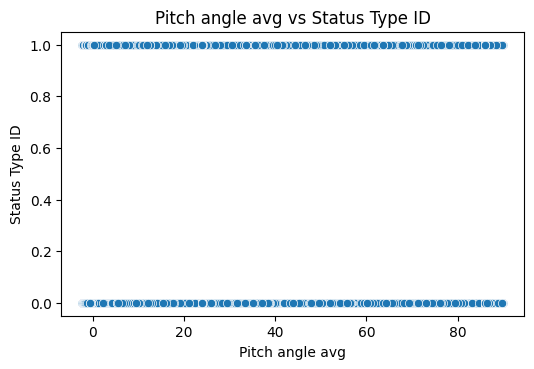

In [ ]:
# List of features to plot against 'status_type_id'
features_to_plot = [
    'Gearbox oil temperature avg',
    'Choke coils on the VCS- section temperature avg',
    'Gearbox bearing on high speed shaft  temperature avg',
    'Generator rpm avg',
    'Possible Grid capacitive reactive power avg',
    'Possible Grid inductive reactive power avg',
    'Pitch angle avg'
]


for i, feature in enumerate(features_to_plot):
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 3, i + 1)  # Create a subplot for each feature
    sns.scatterplot(x=subset_data[feature], y=subset_data['status_type_id'])
    plt.title(f'{feature} vs Status Type ID')
    plt.xlabel(feature)
    plt.ylabel('Status Type ID')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load your dataset
# Assuming unique_data_avg is a DataFrame with the necessary columns
data = unique_data_avg

# Ensure the data is sorted by time
data = data.sort_values(by='time_stamp')

# Initialize a list to store results
results = []

# Iterate through each feature except 'status_type_id', 'time_stamp', and 'asset_id'
features = data.columns.difference(['status_type_id', 'time_stamp', 'asset_id'])

# Debug: Print the features to be tested
print("Features being tested for Granger causality:")
print(features.tolist())

for feature in features:
    # Create a subset of the data for the Granger causality test
    test_data = data[['status_type_id', feature]]

    # Run Granger causality test
    granger_test_result = grangercausalitytests(test_data, maxlag=4)

    # Store the results
    for lag, test in granger_test_result.items():
        results.append({
            'Feature': feature,  # Include the feature name
            'Lag': lag,
            'F-statistic': test[0]['ssr_ftest'][0],
            'p-value': test[0]['ssr_ftest'][1]
        })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Debug: Check if results are captured
if results_df.empty:
    print("No results captured. Please check the data and Granger test.")
else:
    # Display the results in a tabular format
    print("Granger Causality Test Results:")
    print(results_df.to_string(index=False))

Features being tested for Granger causality:
['Actual Phase displacement avg', 'Ambient temperature avg', 'Averaged current phase 1', 'Averaged current phase 2', 'Averaged current phase 3', 'Busbar section temperature avg', 'Choke coils on the VCS- section temperature avg', 'Estimated windspeed avg', 'Gearbox bearing on high speed shaft  temperature avg', 'Gearbox oil temperature avg', 'Generator bearing 1(Non-drive end) temperature avg', 'Generator bearing 2(Drive end)  temperature avg', 'Generator rpm avg', 'Generator stator winding phase 1 temperature avg', 'Generator stator winding phase 2 temperature avg', 'Generator stator winding phase 3 temperature avg', 'IGBT-driver on grid side inverter temperature avg', 'Pitch angle avg', 'Possible Grid active power avg', 'Possible Grid capacitive reactive power avg', 'Possible Grid inductive reactive power avg', 'Split ring chamber temperature avg', 'VCP-board temperature avg', 'VCS cooling water temperature avg', 'Wind relative direction a

Features being tested for Granger causality:
['Actual Phase displacement avg', 'Ambient temperature avg', 'Averaged current phase 1', 'Averaged current phase 2', 'Averaged current phase 3', 'Busbar section temperature avg', 'Choke coils on the VCS- section temperature avg', 'Estimated windspeed avg', 'Gearbox bearing on high speed shaft  temperature avg', 'Gearbox oil temperature avg', 'Generator bearing 1(Non-drive end) temperature avg', 'Generator bearing 2(Drive end)  temperature avg', 'Generator rpm avg', 'Generator stator winding phase 1 temperature avg', 'Generator stator winding phase 2 temperature avg', 'Generator stator winding phase 3 temperature avg', 'IGBT-driver on grid side inverter temperature avg', 'Pitch angle avg', 'Possible Grid active power avg', 'Possible Grid capacitive reactive power avg', 'Possible Grid inductive reactive power avg', 'Split ring chamber temperature avg', 'VCP-board temperature avg', 'VCS cooling water temperature avg', 'Wind relative direction a

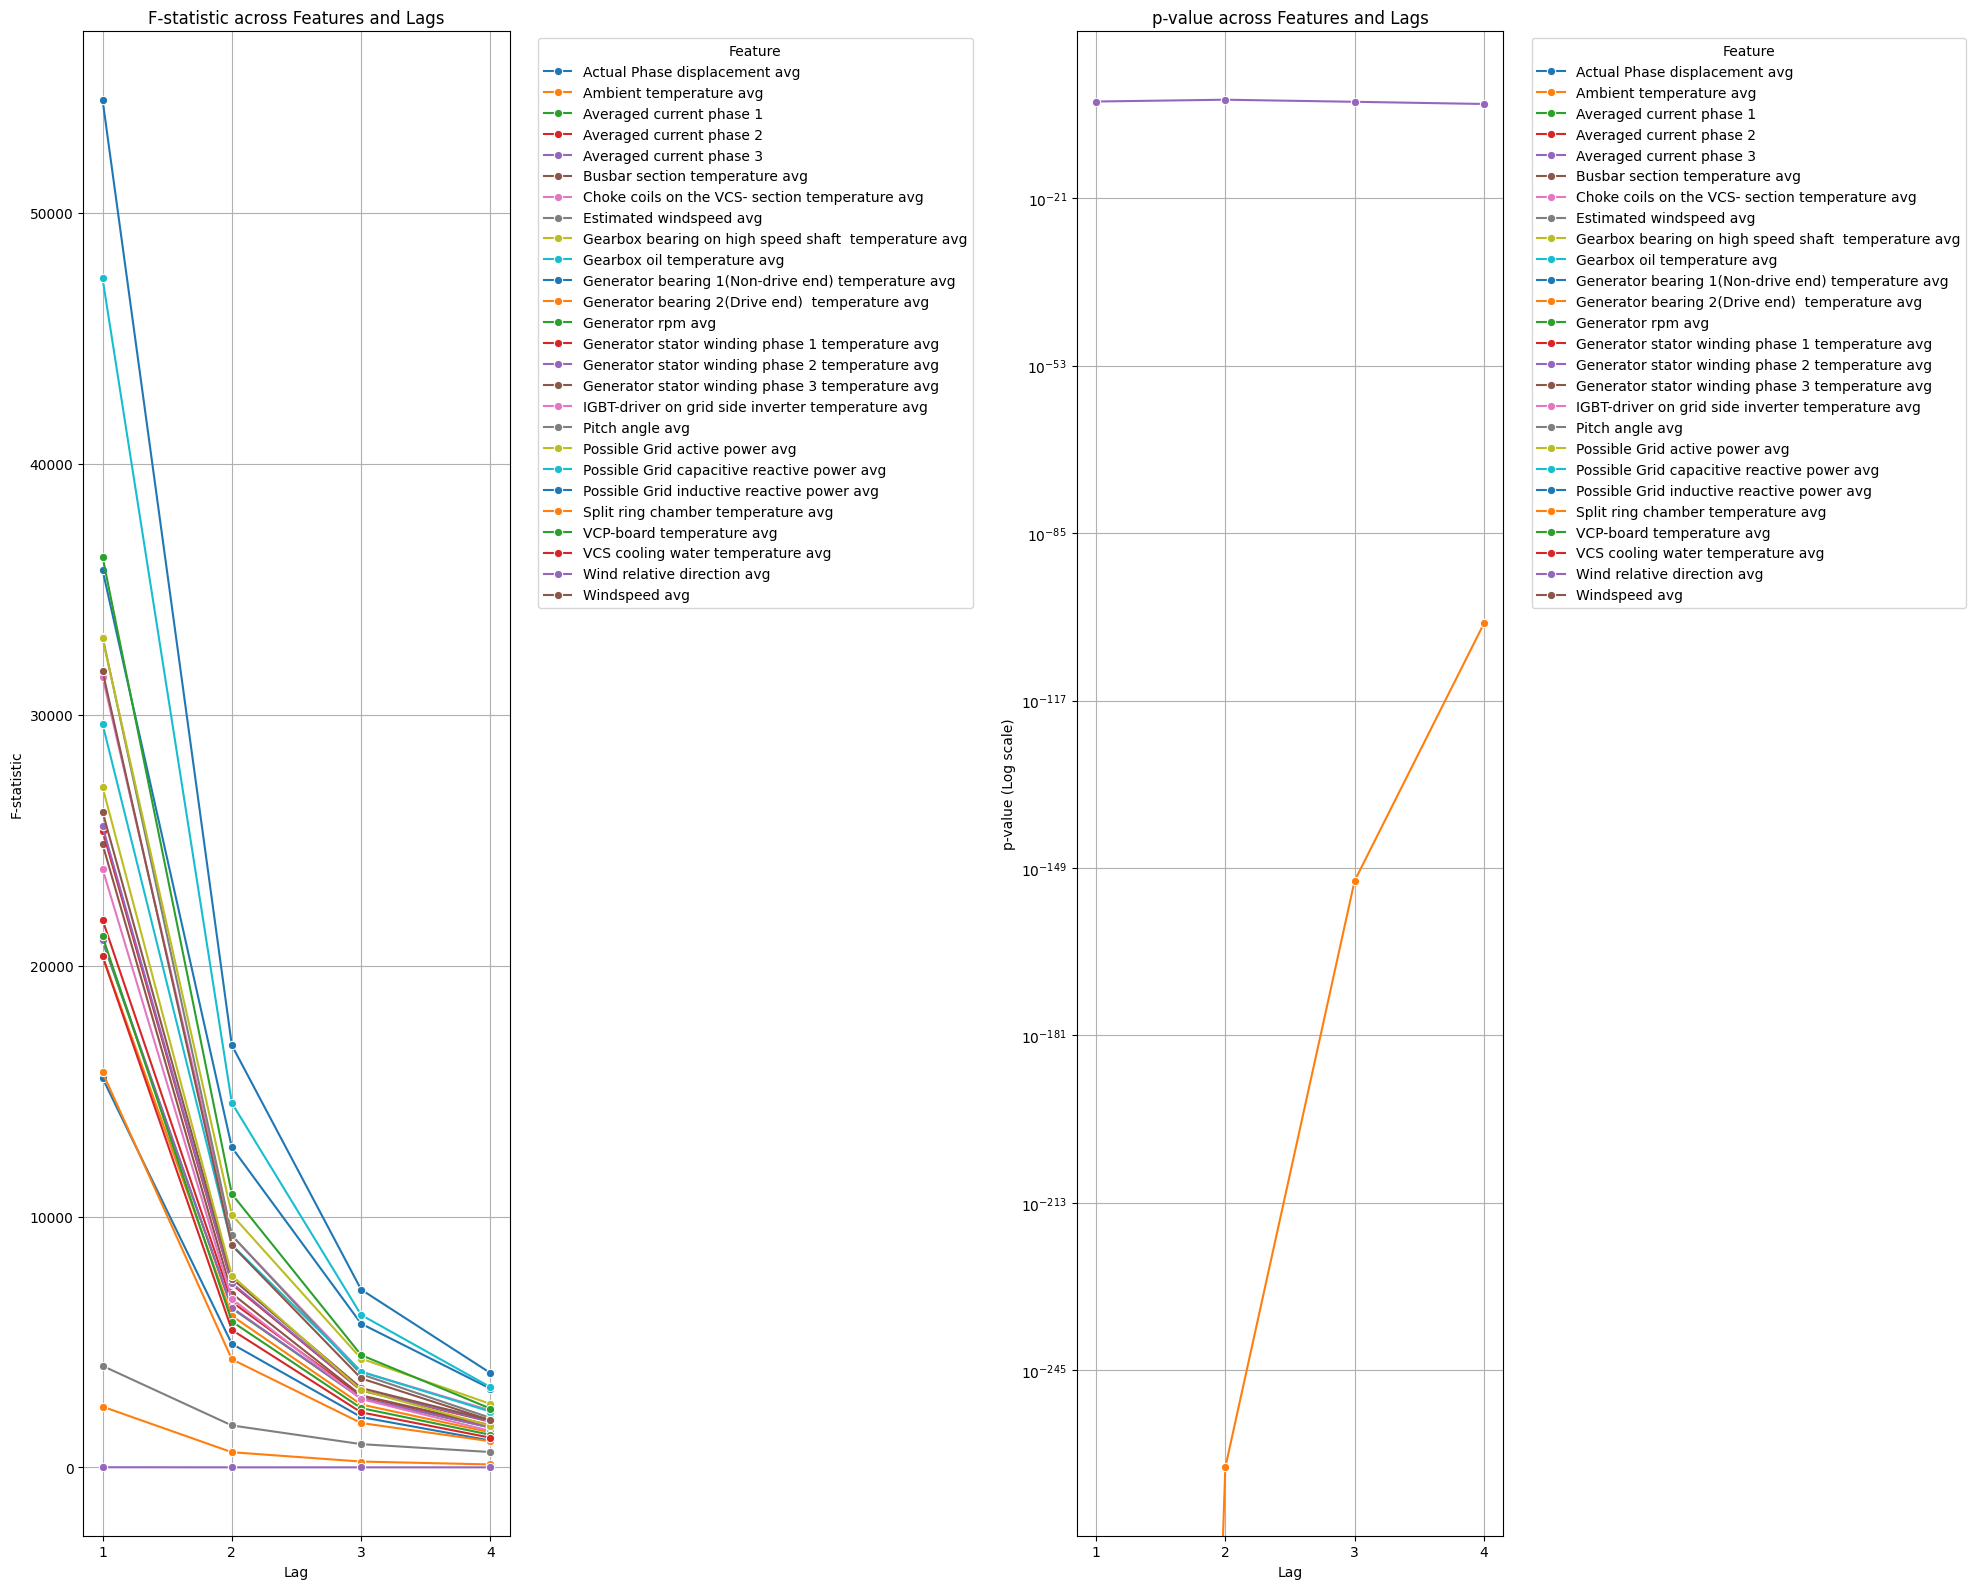

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load your dataset
# Assuming unique_data_avg is a DataFrame with the necessary columns
data = unique_data_avg

# Ensure the data is sorted by time
data = data.sort_values(by='time_stamp')

# Initialize a list to store results
results = []

# Iterate through each feature except 'status_type_id', 'time_stamp', and 'asset_id'
features = data.columns.difference(['status_type_id', 'time_stamp', 'asset_id'])

# Debug: Print the features to be tested
print("Features being tested for Granger causality:")
print(features.tolist())

for feature in features:
    # Create a subset of the data for the Granger causality test
    test_data = data[['status_type_id', feature]]

    # Run Granger causality test
    granger_test_result = grangercausalitytests(test_data, maxlag=4)

    # Store the results
    for lag, test in granger_test_result.items():
        results.append({
            'Feature': feature,  # Include the feature name
            'Lag': lag,
            'F-statistic': test[0]['ssr_ftest'][0],
            'p-value': test[0]['ssr_ftest'][1]
        })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Debug: Check if results are captured
if results_df.empty:
    print("No results captured. Please check the data and Granger test.")
else:
    # Display the results in a tabular format
    print("Granger Causality Test Results:")
    print(results_df.to_string(index=False))

# Step 2: Create visualizations
plt.figure(figsize=(20, 16))

# Visualization for F-statistic
plt.subplot(1, 2, 1)
sns.lineplot(data=results_df, x='Lag', y='F-statistic', hue='Feature', palette='tab10', marker='o')
plt.title('F-statistic across Features and Lags')
plt.xlabel('Lag')
plt.ylabel('F-statistic')
plt.xticks(range(1, 5))  # Set x-ticks for lag values
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Visualization for p-value
plt.subplot(1, 2, 2)
sns.lineplot(data=results_df, x='Lag', y='p-value', hue='Feature', palette='tab10', marker='o')
plt.yscale('log')  # Log scale for better visualization
plt.title('p-value across Features and Lags')
plt.xlabel('Lag')
plt.ylabel('p-value (Log scale)')
plt.xticks(range(1, 5))
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

F-statistic plot saved to granger_causality_f_stat_plot.png


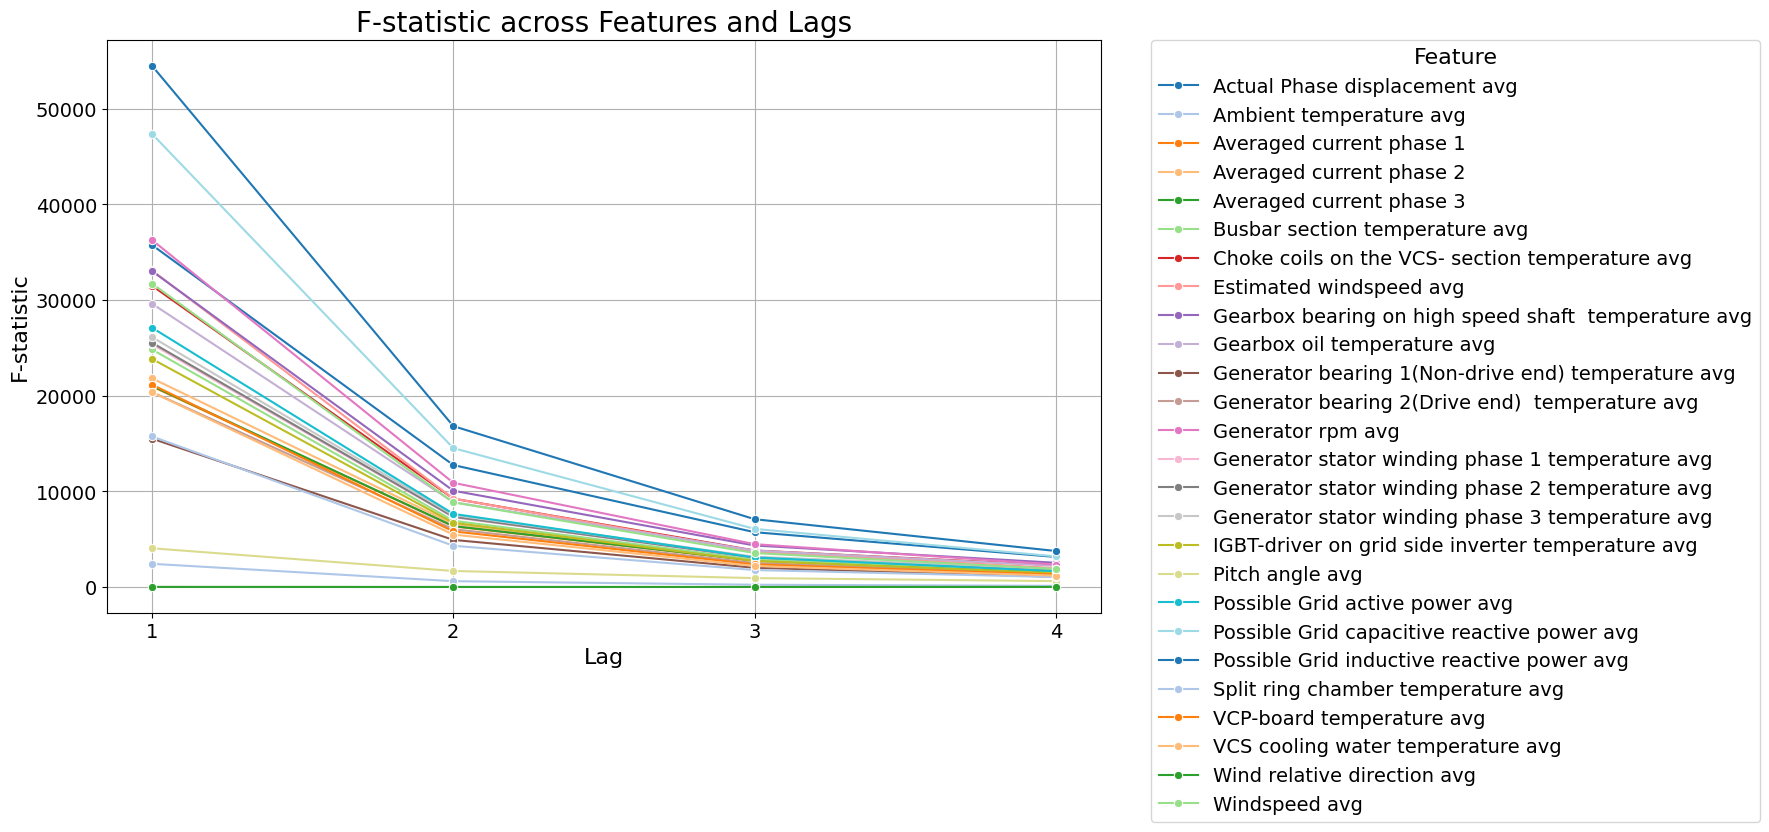

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from docx import Document
from docx.shared import Inches

# Load your dataset
# Assuming unique_data_avg is a DataFrame with the necessary columns
data = unique_data_avg

# Ensure the data is sorted by time
data = data.sort_values(by='time_stamp')

# Initialize a list to store results
results = []

# List of features to be tested
features = data.columns.difference(['status_type_id', 'time_stamp', 'asset_id'])

# # Debug: Print features
# print("Features being tested for Granger causality:", features.tolist())

# Granger causality tests for each feature
for feature in features:
    test_data = data[['status_type_id', feature]]
    granger_test_result = grangercausalitytests(test_data, maxlag=4, verbose=False)

    # Store only F-statistics results
    for lag, test in granger_test_result.items():
        results.append({
            'Feature': feature,
            'Lag': lag,
            'F-statistic': test[0]['ssr_ftest'][0]
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file in the current directory
results_df.to_csv("granger_causality_results.csv", index=False)
# print("Granger causality test results saved to granger_causality_results.csv")

# Visualization for F-statistic only, with a larger legend
plt.figure(figsize=(18, 8))
sns.lineplot(data=results_df, x='Lag', y='F-statistic', hue='Feature', palette='tab20', marker='o')
plt.title('F-statistic across Features and Lags', fontsize=20)
plt.xlabel('Lag', fontsize=16)
plt.ylabel('F-statistic', fontsize=16)
plt.xticks(range(1, 5), fontsize=14)
plt.yticks(fontsize=14)

# Enlarged legend
plt.legend(
    title='Feature',
    title_fontsize='16',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='14',  # Make feature names larger and more readable
    borderaxespad=0
)
plt.grid()
plt.tight_layout()

# Save the F-statistic plot as an image
plt.savefig("granger_causality_f_stat_plot.png", dpi=300, bbox_inches='tight')
print("F-statistic plot saved to granger_causality_f_stat_plot.png")

# # Create a Word document for the report
# doc = Document()
# doc.add_heading('Granger Causality Test Report', level=1)

# # Add F-statistic plot to the document
# doc.add_heading('F-statistic Plot', level=2)
# doc.add_picture("granger_causality_f_stat_plot.png", width=Inches(6))

# # Save the document in the current directory
# doc.save("Granger_Causality_Report.docx")
# print("Report generated: Granger_Causality_Report.docx")